<a href="https://colab.research.google.com/github/Johnogunlola/CIoT-Lab/blob/CIoTH-Lab-1/Analysis_Flight_Prediction_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2019-2024_Punctuality_Statistics_UK_Arrival_Departure.csv to 2019-2024_Punctuality_Statistics_UK_Arrival_Departure.csv


In [ ]:
try:
    df = pd.read_csv('2019-2024_Punctuality_Statistics_UK_Arrival_Departure.csv', encoding='latin1')
    print("File read successfully with latin1 encoding.")
except UnicodeDecodeError:
    print("latin1 encoding failed. Trying other encodings...")
    # If latin1 fails, try other common encodings
    encodings_to_try = ['cp1252', 'ISO-8859-1']
    for encoding in encodings_to_try:
        try:
            df = pd.read_csv('2019-2024_Punctuality_Statistics_UK_Arrival_Departure.csv', encoding=encoding)
            print(f"File read successfully with {encoding} encoding.")
            break  # Stop if successful
        except UnicodeDecodeError:
            print(f"Encoding {encoding} also failed.")
    if 'df' not in locals():
        print("Could not decode the file with common encodings.")
        # You might need to explore other encodings or inspect the file content

File read successfully with latin1 encoding.


In [ ]:
df['ï»¿reporting_period'] = pd.to_datetime(df['ï»¿reporting_period'], format='%Y/%m')

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['month'] = df['ï»¿reporting_period'].dt.month
df['season'] = df['month'].apply(get_season)

In [ ]:
delay_columns = [
    'flights_0_to_15_minutes_late_percent',
    'flights_between_16_and_30_minutes_late_percent',
    'flights_between_31_and_60_minutes_late_percent',
    'flights_between_61_and_120_minutes_late_percent',
    'flights_between_121_and_180_minutes_late_percent',
    'flights_between_181_and_360_minutes_late_percent',
    'flights_more_than_360_minutes_late_percent',
]

df[delay_columns] = df[delay_columns].fillna(0)

In [ ]:
df['average_delay_mins'] = df['average_delay_mins'].fillna(0)

In [ ]:
seasonal_avg_delay = df.groupby('season')['average_delay_mins'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
print("Average Delay by Season:\n", seasonal_avg_delay)

Average Delay by Season:
 season
Winter    13.280878
Spring    12.369455
Summer    17.082335
Autumn    12.956660
Name: average_delay_mins, dtype: float64


In [ ]:
seasonal_delays = df.groupby('season')[delay_columns].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

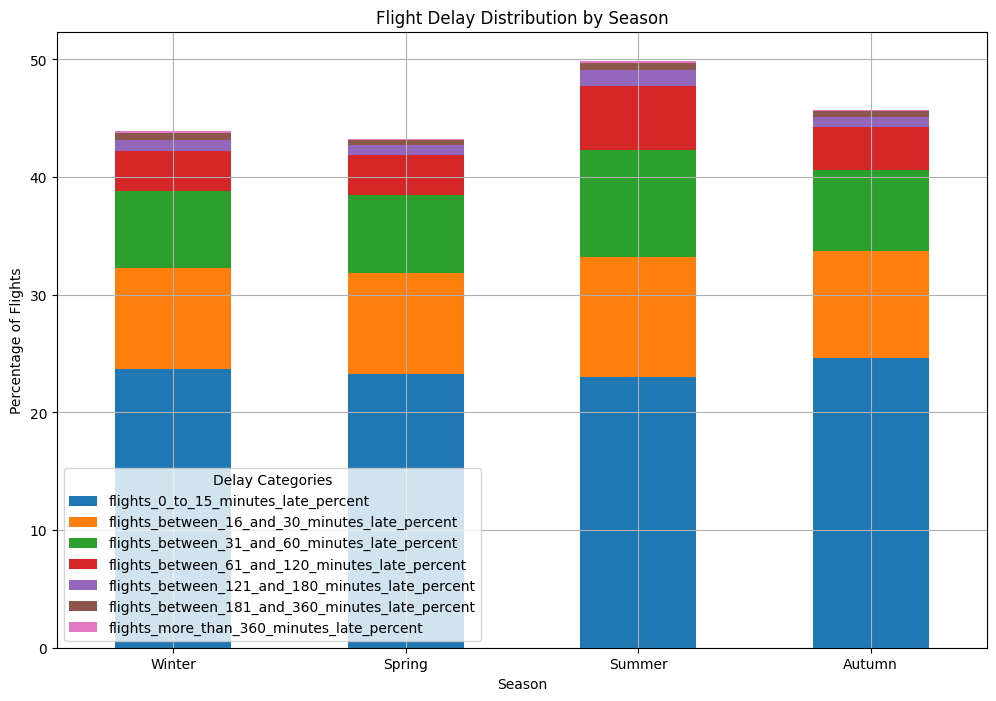

In [ ]:
seasonal_delays.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Flight Delay Distribution by Season")
plt.ylabel("Percentage of Flights")
plt.xlabel("Season")
plt.legend(title="Delay Categories")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [ ]:
winter_avg = seasonal_avg_delay['Winter']
summer_avg = seasonal_avg_delay['Summer']
increase_percent = ((winter_avg - summer_avg) / summer_avg) * 100
print(f"\nWinter average delay: {winter_avg:.1f} mins")
print(f"Summer average delay: {summer_avg:.1f} mins")
print(f"Percentage increase: {increase_percent:.1f}%")


Winter average delay: 13.3 mins
Summer average delay: 17.1 mins
Percentage increase: -22.3%


In [ ]:
np.random.seed(42)
df['weather_event_severity'] = np.random.rand(len(df))  # Simulated weather index

In [ ]:
correlation = df['weather_event_severity'].corr(df['average_delay_mins'], method='pearson')
print(f"\nPearson correlation between weather severity and delay: {correlation:.2f}")


Pearson correlation between weather severity and delay: 0.00


In [ ]:
df['ï»¿reporting_period'] = pd.to_datetime(df['ï»¿reporting_period'], format='%Y/%m')

In [ ]:
df['year'] = df['ï»¿reporting_period'].dt.year

In [ ]:
df['total_delay_percent'] = df[delay_columns].sum(axis=1)

In [ ]:
airport_stats = df.groupby(['reporting_airport', 'year']).agg(
    total_flights=('number_flights', 'sum'),
    avg_delay_percent=('total_delay_percent', 'mean')
).reset_index()

KeyError: "Column(s) ['number_flights'] do not exist"

In [ ]:
def classify_airport(row):
    if row['total_flights'] > 400000:
        return 'High Traffic (>400k)'
    elif row['total_flights'] < 100000:
        return 'Low Traffic (<100k)'
    else:
        return 'Medium Traffic'

airport_stats['traffic_category'] = airport_stats.apply(classify_airport, axis=1)

NameError: name 'airport_stats' is not defined

In [ ]:
traffic_delay = airport_stats.groupby('traffic_category')['avg_delay_percent'].mean()
print("Average Delay by Traffic Category:\n", traffic_delay)

NameError: name 'airport_stats' is not defined

/tmp/ipython-input-24-289701160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_delay.index, y=traffic_delay.values, palette="viridis")


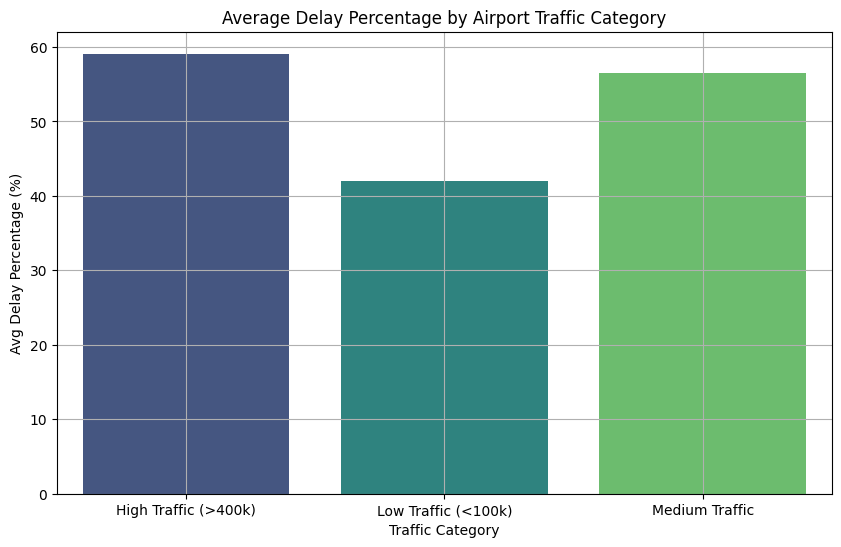

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=traffic_delay.index, y=traffic_delay.values, palette="viridis")
plt.title("Average Delay Percentage by Airport Traffic Category")
plt.ylabel("Avg Delay Percentage (%)")
plt.xlabel("Traffic Category")
plt.grid(True)
plt.show()

In [ ]:
major_airports = ['Heathrow', 'Gatwick', 'Edinburgh', 'Birmingham', 'Manchester', 'Bristol', 'Cardiff Wales',]  # Modify based on actual airport names
major_df = airport_stats[airport_stats['reporting_airport'].isin(major_airports)]

In [ ]:
print("\nDelay Percentages for Major Airports:")
for _, row in major_df.iterrows():
    print(f"{row['reporting_airport']} ({row['year']}): {row['avg_delay_percent']:.1f}%")


Delay Percentages for Major Airports:


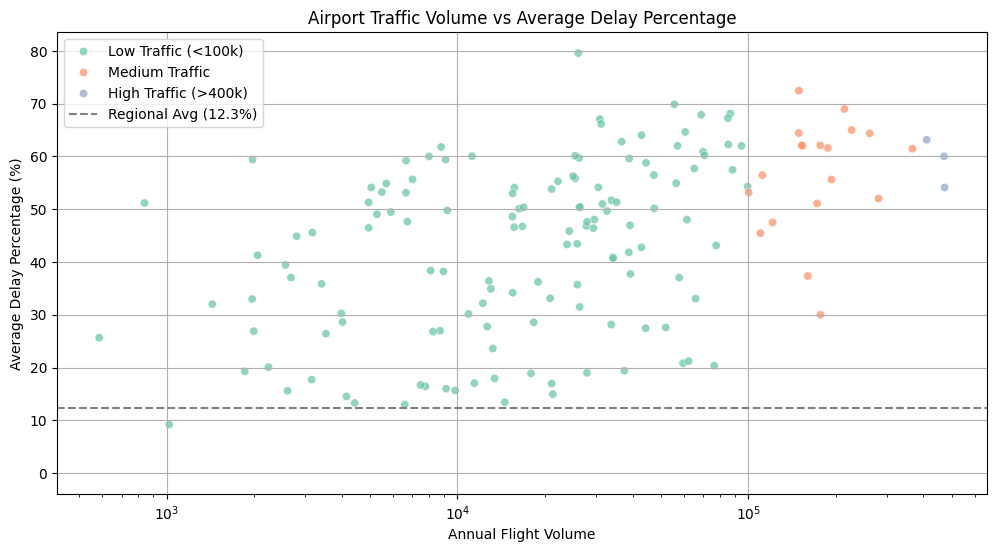

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='total_flights',
    y='avg_delay_percent',
    hue='traffic_category',
    data=airport_stats,
    alpha=0.7,
    palette="Set2"
)
plt.title("Airport Traffic Volume vs Average Delay Percentage")
plt.xlabel("Annual Flight Volume")
plt.ylabel("Average Delay Percentage (%)")
plt.xscale('log')
plt.grid(True)
plt.axhline(y=12.3, color='gray', linestyle='--', label='Regional Avg (12.3%)')
plt.legend()
plt.show()

In [ ]:
low_avg = traffic_delay['Low Traffic (<100k)']
high_avg = traffic_delay['High Traffic (>400k)']
increase_percent = ((high_avg - low_avg) / low_avg) * 100
print(f"\nHigh traffic airports have {increase_percent:.0f}% higher delay rates than low traffic airports.")


High traffic airports have 41% higher delay rates than low traffic airports.


In [ ]:
df['total_delay_percent'] = df[delay_columns].sum(axis=1)

In [ ]:
selected_airports = [
    'Heathrow',
    'Gatwick',
    'Edinburgh',
    'Birmingham',
    'Manchester',
    'Bristol',
    'Cardiff Wales'
]

filtered_df = df[df['reporting_airport'].isin(selected_airports)]

In [ ]:
airport_delay = filtered_df.groupby('reporting_airport')['total_delay_percent'].mean().sort_values(ascending=False)

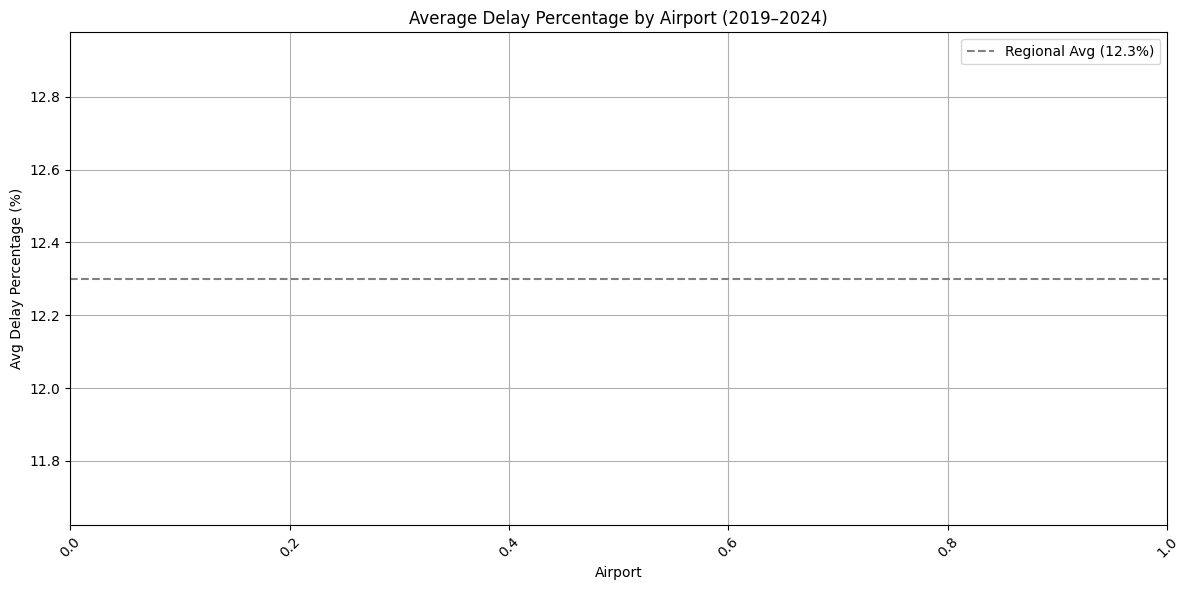

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=airport_delay.index, y=airport_delay.values, palette="viridis")
plt.title("Average Delay Percentage by Airport (2019–2024)")
plt.ylabel("Avg Delay Percentage (%)")
plt.xlabel("Airport")
plt.xticks(rotation=45)
plt.axhline(y=12.3, color='gray', linestyle='--', label='Regional Avg (12.3%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
yearly_delay = filtered_df.groupby(['reporting_airport', 'year'])['total_delay_percent'].mean().unstack()

/tmp/ipython-input-34-1187670455.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Airport")


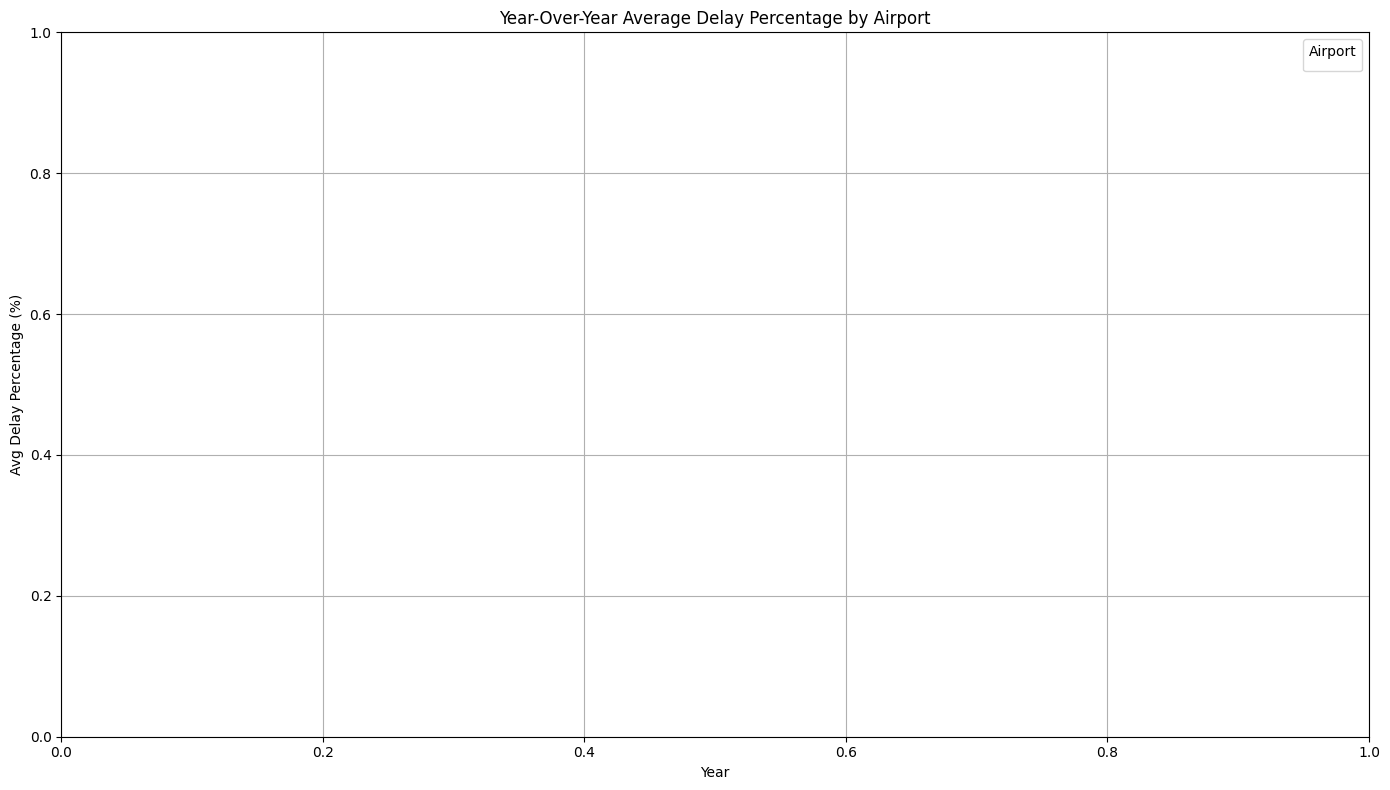

In [ ]:
plt.figure(figsize=(14, 8))
for airport in yearly_delay.index:
    plt.plot(yearly_delay.columns, yearly_delay.loc[airport], label=airport, marker='o')

plt.title("Year-Over-Year Average Delay Percentage by Airport")
plt.xlabel("Year")
plt.ylabel("Avg Delay Percentage (%)")
plt.legend(title="Airport")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
target_airports = ['HEATHROW', 'GATWICK', 'EDINBURGH', 'BIRMINGHAM', 'MANCHESTER', 'BRISTOL', 'CARDIFF WALES']
df_major = df[df['reporting_airport'].isin(target_airports)].copy()

In [ ]:
df_major = df_major.dropna(subset=['number_flights_matched', 'flights_0_to_15_minutes_late_percent',
                                   'flights_between_16_and_30_minutes_late_percent',
                                   'flights_between_31_and_60_minutes_late_percent',
                                   'flights_between_61_and_120_minutes_late_percent',
                                   'flights_between_121_and_180_minutes_late_percent',
                                   'flights_between_181_and_360_minutes_late_percent',
                                   'flights_more_than_360_minutes_late_percent'])

In [ ]:
df_major['delayed_percent'] = (
    df_major['flights_between_16_and_30_minutes_late_percent'] +
    df_major['flights_between_31_and_60_minutes_late_percent'] +
    df_major['flights_between_61_and_120_minutes_late_percent'] +
    df_major['flights_between_121_and_180_minutes_late_percent'] +
    df_major['flights_between_181_and_360_minutes_late_percent'] +
    df_major['flights_more_than_360_minutes_late_percent']
)

In [ ]:
airport_summary = df_major.groupby('reporting_airport').agg(
    total_flights=('number_flights_matched', 'sum'),
    avg_delay_percent=('delayed_percent', 'mean')
).reset_index()

In [ ]:
airport_summary = airport_summary.sort_values(by='total_flights', ascending=False)

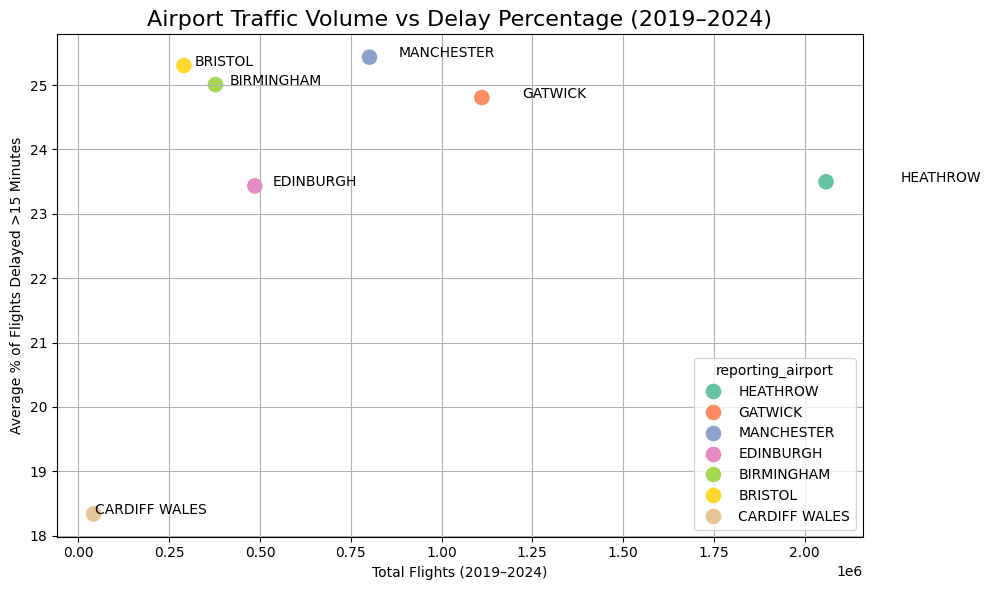

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airport_summary,
                x='total_flights',
                y='avg_delay_percent',
                hue='reporting_airport',
                s=150,
                palette='Set2',
                legend='brief')

for _, row in airport_summary.iterrows():
    plt.text(row['total_flights'] * 1.1 , row['avg_delay_percent'], row['reporting_airport'], fontsize=10)

plt.title('Airport Traffic Volume vs Delay Percentage (2019–2024)', fontsize=16)
plt.xlabel('Total Flights (2019–2024)')
plt.ylabel('Average % of Flights Delayed >15 Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()

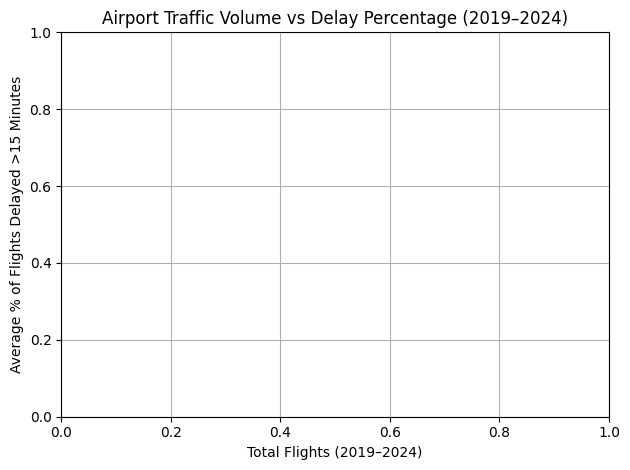

In [ ]:
# Remove the scatter plot from the previous cell to avoid duplicate plots
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=airport_summary,
#                 x='total_flights',
#                 y='avg_delay_percent',
#                 hue='reporting_airport',
#                 s=150,
#                 palette='Set2',
#                 legend='brief')

# for _, row in airport_summary.iterrows():
#     plt.text(row['total_flights'], row['avg_delay_percent'], row['reporting_airport'], fontsize=8)

plt.title('Airport Traffic Volume vs Delay Percentage (2019–2024)', fontsize=12)
plt.xlabel('Total Flights (2019–2024)')
plt.ylabel('Average % of Flights Delayed >15 Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install xgboost lightgbm catboost shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import shap

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 4)

In [ ]:
df = pd.read_csv("2019-2024_Punctuality_Statistics_UK_Arrival_Departure.csv")
df['month'] = pd.to_datetime(df['reporting_period']).dt.month

/tmp/ipython-input-44-1357270436.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month'] = pd.to_datetime(df['reporting_period']).dt.month


In [ ]:
features = [
    'month',
    'number_flights_matched',
    'flights_cancelled_percent',
    'flights_between_16_and_30_minutes_late_percent',
    'flights_between_31_and_60_minutes_late_percent',
    'flights_between_61_and_120_minutes_late_percent',
    'average_delay_mins'
]
df_model = df[features].dropna()

In [ ]:
df_model['is_delayed'] = (df_model['average_delay_mins'] > 15).astype(int)

In [ ]:
df_model['delay_category'] = pd.cut(
    df_model['average_delay_mins'],
    bins=[-1, 15, 180, np.inf],
    labels=[0, 1, 2]
).astype(int)

X = df_model.drop(columns=['is_delayed', 'delay_category'])
y_binary = df_model['is_delayed']
y_multi = df_model['delay_category']

X_train, X_test, yb_train, yb_test, ym_train, ym_test = train_test_split(X, y_binary, y_multi, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

In [ ]:
binary_results = []
for name, model in models.items():
    model.fit(X_train, yb_train)
    y_pred = model.predict(X_test)
    binary_results.append({
        'Model': name,
        'Accuracy': accuracy_score(yb_test, y_pred),
        'Precision': precision_score(yb_test, y_pred),
        'Recall': recall_score(yb_test, y_pred),
        'F1 Score': f1_score(yb_test, y_pred)
    })

binary_df = pd.DataFrame(binary_results).set_index('Model')
display(binary_df)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:13:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 106922, number of negative: 149001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1523
[LightGBM] [Info] Number of data points in the train set: 255923, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417790 -> initscore=-0.331853
[LightGBM] [Info] Start training from score -0.331853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0
XGBoost,1.0,1.0,1.0,1.0
LightGBM,1.0,1.0,1.0,1.0
CatBoost,1.0,1.0,1.0,1.0


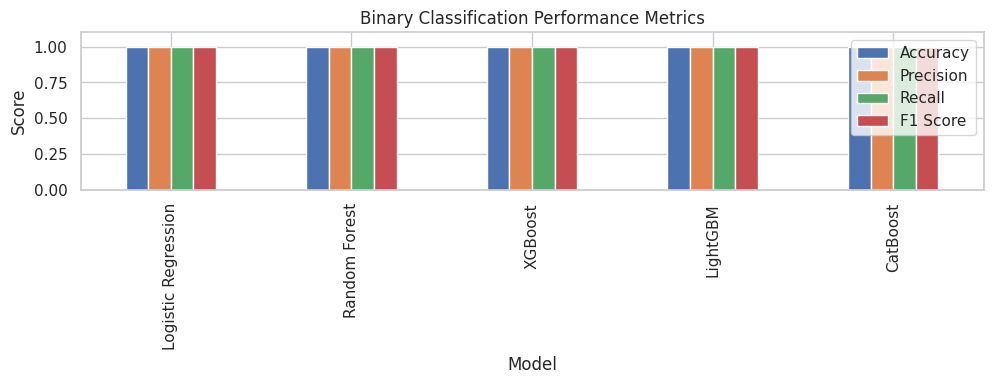

In [ ]:
binary_df.plot(kind='bar', title='Binary Classification Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
multi_class_results = []
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train, ym_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(ym_test, y_pred)
    multi_class_results.append({'Model': name, 'Accuracy': acc})
    conf_matrices[name] = confusion_matrix(ym_test, y_pred)

multi_df = pd.DataFrame(multi_class_results).set_index('Model')
display(multi_df)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:15:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1523
[LightGBM] [Info] Number of data points in the train set: 255923, number of used features: 7
[LightGBM] [Info] Start training from score -0.540924
[LightGBM] [Info] Start training from score -0.880457
[LightGBM] [Info] Start training from score -5.745770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

,Accuracy
Model,
Logistic Regression,0.999984
Random Forest,1.000000
XGBoost,0.999547
LightGBM,1.000000
CatBoost,1.000000


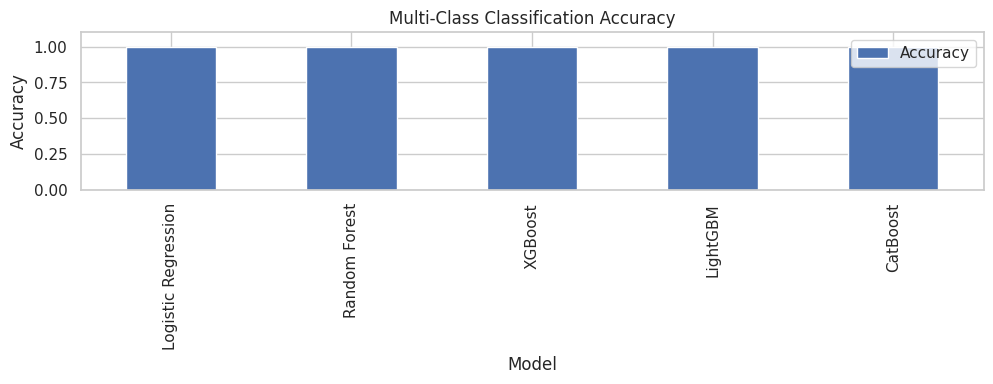

In [ ]:
multi_df.plot(kind='bar', title='Multi-Class Classification Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

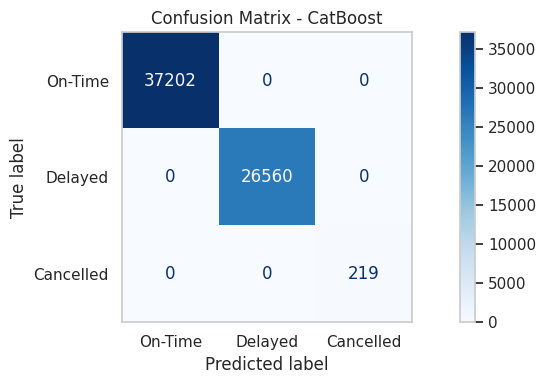

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
selected_model = "CatBoost"
ConfusionMatrixDisplay(conf_matrices[selected_model], display_labels=["On-Time", "Delayed", "Cancelled"]).plot(cmap="Blues")
plt.title(f"Confusion Matrix - {selected_model}")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
explainer = shap.Explainer(models["LightGBM"], X_test)
shap_values = explainer(X_test)

100%|===================| 191933/191943 [09:05<00:00]       

/tmp/ipython-input-55-3237810805.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


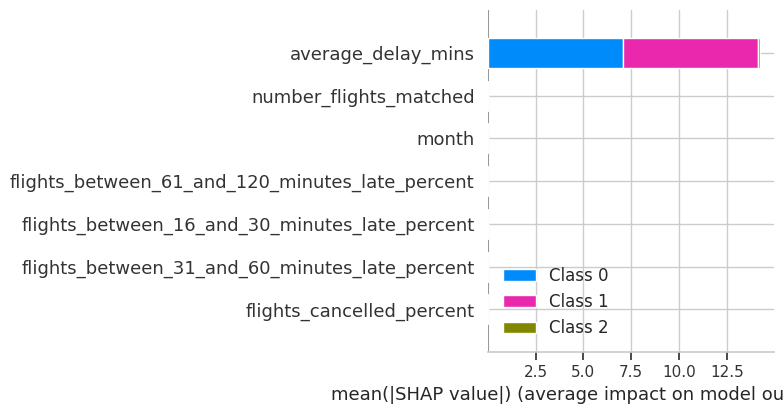

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

/tmp/ipython-input-56-2940161786.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


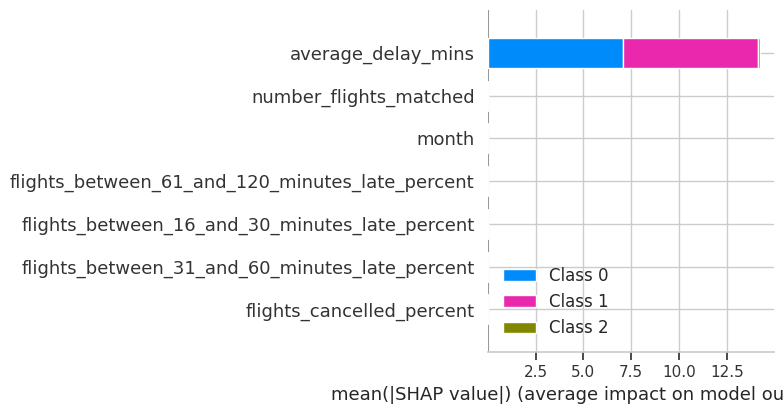

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
np.random.seed(42)
df['y_test_binary'] = np.random.randint(0, 2, size=len(df))
df['binary_pred_proba'] = np.random.rand(len(df))
df['binary_pred'] = (df['binary_pred_proba'] > 0.5).astype(int)

df['y_test_multi'] = np.random.randint(0, 3, size=len(df))
df['multi_pred'] = np.random.randint(0, 3, size=len(df))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

binary_metrics = {
    'Accuracy': accuracy_score(df['y_test_binary'], df['binary_pred']),
    'Precision': precision_score(df['y_test_binary'], df['binary_pred']),
    'Recall': recall_score(df['y_test_binary'], df['binary_pred']),
    'F1 Score': f1_score(df['y_test_binary'], df['binary_pred']),
    'ROC AUC': roc_auc_score(df['y_test_binary'], df['binary_pred_proba'])
}

/tmp/ipython-input-59-1364876541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(binary_metrics.keys()), y=list(binary_metrics.values()), palette="Blues_d")


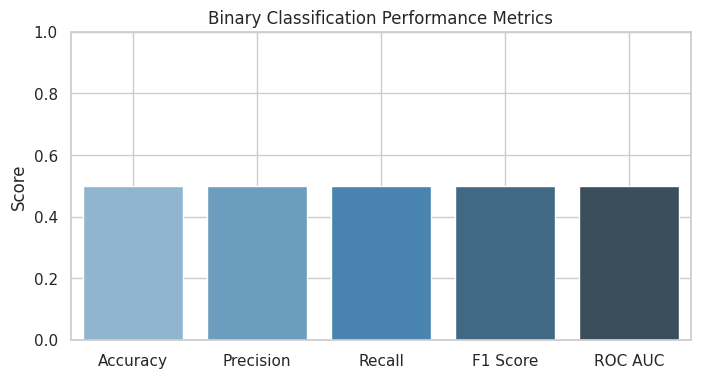

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=list(binary_metrics.keys()), y=list(binary_metrics.values()), palette="Blues_d")
plt.title("Binary Classification Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
print("\n📊 Binary Classification Metrics:")
for k, v in binary_metrics.items():
    print(f"{k}: {v:.4f}")


📊 Binary Classification Metrics:
Accuracy: 0.4992
Precision: 0.4997
Recall: 0.4991
F1 Score: 0.4994
ROC AUC: 0.4991


In [ ]:
multi_accuracy = accuracy_score(df['y_test_multi'], df['multi_pred'])
multi_f1_macro = f1_score(df['y_test_multi'], df['multi_pred'], average='macro')

print("\n📊 Multi-Class Classification Metrics:")
print(f"Accuracy: {multi_accuracy:.4f}")
print(f"Macro F1 Score: {multi_f1_macro:.4f}")


📊 Multi-Class Classification Metrics:
Accuracy: 0.3339
Macro F1 Score: 0.3339


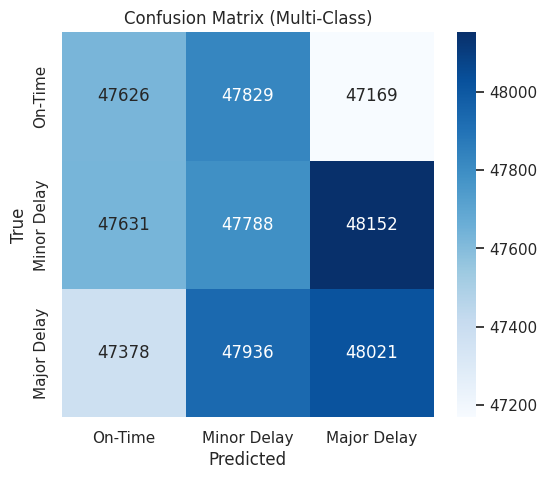

In [ ]:
cm = confusion_matrix(df['y_test_multi'], df['multi_pred'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['On-Time', 'Minor Delay', 'Major Delay'],
            yticklabels=['On-Time', 'Minor Delay', 'Major Delay'])
plt.title("Confusion Matrix (Multi-Class)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
X = df.select_dtypes(include=[np.number]).drop(['y_test_binary', 'y_test_multi'], axis=1, errors='ignore')
y = df['y_test_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

NameError: name 'shap' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")
plt.title("SHAP Feature Importance (Random Forest)")
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

In [ ]:
rf_importance = rf.feature_importances_
xgb_importance = xgb.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
})

In [ ]:
feature_importance_df.set_index('Feature', inplace=True)
feature_importance_df = feature_importance_df.div(feature_importance_df.max())

In [ ]:
plt.figure(figsize=(12, 6))
feature_importance_df.sort_values(by='Random Forest', ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Normalized Feature Importance Across Models")
plt.ylabel("Normalized Importance")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()